# After creating a script to download the data, and running it, I will look at the data and test some of the functions that I implemented for its analysis (most of them were implemented to solve the Machine Learning for Trading assignments).

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.optimize as spo
import sys

%matplotlib inline

%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

%load_ext autoreload
%autoreload 2

sys.path.append('../../')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_df = pd.read_pickle('../../data/data_df.pkl')

In [4]:
print(data_df.shape)
data_df.head(25)

(30120, 503)


SPY         MMM          ABT  ABBV  ACN  ATVI  AYI  \
date       feature                                                              
1993-01-29 Open           0.00        0.00         0.00   NaN  NaN   NaN  NaN   
           High          43.97       24.62         6.88   NaN  NaN   NaN  NaN   
           Low           43.75       24.47         6.75   NaN  NaN   NaN  NaN   
           Close         43.94       24.50         6.88   NaN  NaN   NaN  NaN   
           Volume   1003200.00  1242800.00   4638400.00   NaN  NaN   NaN  NaN   
1993-02-01 Open           0.00        0.00         0.00   NaN  NaN   NaN  NaN   
           High          44.25       24.69         6.97   NaN  NaN   NaN  NaN   
           Low           43.97       24.47         6.78   NaN  NaN   NaN  NaN   
           Close         44.25       24.69         6.88   NaN  NaN   NaN  NaN   
           Volume    480500.00   749600.00   4450400.00   NaN  NaN   NaN  NaN   
1993-02-02 Open           0.00        0.00         0.00   NaN  NaN   NaN  NaN   
           High          44.38       24.88         6.88   NaN  NaN   NaN  NaN   
           Low           44.12       24.69         6.53   NaN  NaN   NaN  NaN   
           Close         44.34       24.72         6.53   NaN  NaN   NaN  NaN   
           Volume    201300.00  1233600.00  10030000.00   NaN  NaN   NaN  NaN   
1993-02-03 Open           0.00        0.00         0.00   NaN  NaN   NaN  NaN   
           High          44.84       25.41         6.94   NaN  NaN   NaN  NaN   
           Low           44.38       24.88         6.50   NaN  NaN   NaN  NaN   
           Close         44.81       25.19         6.91   NaN  NaN   NaN  NaN   
           Volume    529400.00  2900400.00  12490000.00   NaN  NaN   NaN  NaN   
1993-02-04 Open           0.00        0.00         0.00   NaN  NaN   NaN  NaN   
           High          45.09       26.47         6.97   NaN  NaN   NaN  NaN   
           Low           44.88       25.88         6.78   NaN  NaN   NaN  NaN   
           Close         45.00       26.06         6.84   NaN  NaN   NaN  NaN   
           Volume    531500.00  4122400.00   5190800.00   NaN  NaN   NaN  NaN   

                           ADBE         AMD  AAP ...         XEL         XRX  \
date       feature                               ...                           
1993-01-29 Open            0.00        0.00  NaN ...        0.00        0.00   
           High            2.64       19.12  NaN ...       22.00       14.32   
           Low             2.56       18.62  NaN ...       21.88       13.84   
           Close           2.59       18.75  NaN ...       22.00       14.28   
           Volume    4990400.00   730600.00  NaN ...    87800.00  7633602.00   
1993-02-01 Open            0.00        0.00  NaN ...        0.00        0.00   
           High            2.75       19.25  NaN ...       22.19       14.24   
           Low             2.53       18.50  NaN ...       21.94       14.07   
           Close           2.72       19.12  NaN ...       22.19       14.09   
           Volume    8670400.00   750300.00  NaN ...    72400.00  3001200.00   
1993-02-02 Open            0.00        0.00  NaN ...        0.00        0.00   
           High            2.86       20.25  NaN ...       22.12       14.13   
           Low             2.73       19.38  NaN ...       21.88       13.99   
           Close           2.84       20.25  NaN ...       22.06       14.09   
           Volume   11491200.00  1418100.00  NaN ...   242200.00  1388598.00   
1993-02-03 Open            0.00        0.00  NaN ...        0.00        0.00   
           High            2.86       20.62  NaN ...       22.38       14.13   
           Low             2.69       20.12  NaN ...       22.12       14.01   
           Close           2.70       20.50  NaN ...       22.38       14.03   
           Volume   11788800.00  2163500.00  NaN ...   272200.00  1228200.00   
1993-02-04 Open            0.00        0.00  NaN ...        0.00        0.00   

## What if I only want the 'Close' value, maybe in a range, for only some symbols?

In [4]:
data_df.xs('Close', level='feature')

,SPY,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,43.94,24.50,6.88,NaN,NaN,NaN,NaN,2.59,18.75,NaN,...,22.00,14.28,2.50,NaN,NaN,NaN,NaN,NaN,10.94,NaN
1993-02-01,44.25,24.69,6.88,NaN,NaN,NaN,NaN,2.72,19.12,NaN,...,22.19,14.09,2.62,NaN,NaN,NaN,NaN,NaN,11.06,NaN
1993-02-02,44.34,24.72,6.53,NaN,NaN,NaN,NaN,2.84,20.25,NaN,...,22.06,14.09,2.64,NaN,NaN,NaN,NaN,NaN,11.12,NaN
1993-02-03,44.81,25.19,6.91,NaN,NaN,NaN,NaN,2.70,20.50,NaN,...,22.38,14.03,2.68,NaN,NaN,NaN,NaN,NaN,11.25,NaN
1993-02-04,45.00,26.06,6.84,NaN,NaN,NaN,NaN,2.73,20.12,NaN,...,22.81,14.15,2.67,NaN,NaN,NaN,NaN,NaN,11.69,NaN
1993-02-05,44.97,27.19,6.88,NaN,NaN,NaN,NaN,2.60,19.62,NaN,...,22.56,14.38,2.52,NaN,NaN,NaN,NaN,NaN,11.75,NaN
1993-02-08,44.97,27.25,6.66,NaN,NaN,NaN,NaN,2.62,19.75,NaN,...,22.56,14.55,2.49,NaN,NaN,NaN,NaN,NaN,11.81,NaN
1993-02-09,44.66,27.25,6.84,NaN,NaN,NaN,NaN,2.59,19.75,NaN,...,22.44,14.40,2.41,NaN,NaN,NaN,NaN,NaN,11.56,NaN
1993-02-10,44.72,27.31,6.88,NaN,NaN,NaN,NaN,2.56,19.75,NaN,...,22.56,14.49,2.44,NaN,NaN,NaN,NaN,NaN,11.62,NaN


In [5]:
data_df.loc[dt.datetime(1993,2,4):dt.datetime(1993,2,7)]

SPY         MMM         ABT  ABBV  ACN  ATVI  AYI  \
date       feature                                                            
1993-02-04 Open          0.00        0.00        0.00   NaN  NaN   NaN  NaN   
           High         45.09       26.47        6.97   NaN  NaN   NaN  NaN   
           Low          44.88       25.88        6.78   NaN  NaN   NaN  NaN   
           Close        45.00       26.06        6.84   NaN  NaN   NaN  NaN   
           Volume   531500.00  4122400.00  5190800.00   NaN  NaN   NaN  NaN   
1993-02-05 Open          0.00        0.00        0.00   NaN  NaN   NaN  NaN   
           High         45.06       27.19        6.88   NaN  NaN   NaN  NaN   
           Low          44.72       26.41        6.69   NaN  NaN   NaN  NaN   
           Close        44.97       27.19        6.88   NaN  NaN   NaN  NaN   
           Volume   492100.00  4561600.00  4448400.00   NaN  NaN   NaN  NaN   

                          ADBE         AMD  AAP ...         XEL         XRX  \
date       feature                              ...                           
1993-02-04 Open           0.00        0.00  NaN ...        0.00        0.00   
           High           2.78       20.88  NaN ...       22.81       14.17   
           Low            2.70       20.12  NaN ...       22.50       14.09   
           Close          2.73       20.12  NaN ...       22.81       14.15   
           Volume   6441600.00  1330200.00  NaN ...   162800.00  1675602.00   
1993-02-05 Open           0.00        0.00  NaN ...        0.00        0.00   
           High           2.77       20.50  NaN ...       22.69       14.38   
           Low            2.59       19.62  NaN ...       22.31       14.11   
           Close          2.60       19.62  NaN ...       22.56       14.38   
           Volume   9843200.00  1024600.00  NaN ...    73600.00  3104598.00   

                          XLNX  XL  XYL  YHOO  YUM  ZBH       ZION  ZTS  
date       feature                                                       
1993-02-04 Open           0.00 NaN  NaN   NaN  NaN  NaN       0.00  NaN  
           High           2.77 NaN  NaN   NaN  NaN  NaN      11.75  NaN  
           Low            2.66 NaN  NaN   NaN  NaN  NaN      11.44  NaN  
           Close          2.67 NaN  NaN   NaN  NaN  NaN      11.69  NaN  
           Volume   7033200.00 NaN  NaN   NaN  NaN  NaN  317200.00  NaN  
1993-02-05 Open           0.00 NaN  NaN   NaN  NaN  NaN       0.00  NaN  
           High           2.71 NaN  NaN   NaN  NaN  NaN      11.75  NaN  
           Low            2.44 NaN  NaN   NaN  NaN  NaN      11.44  NaN  
           Close          2.52 NaN  NaN   NaN  NaN  NaN      11.75  NaN  
           Volume   7197600.00 NaN  NaN   NaN  NaN  NaN  292400.00  NaN  

[10 rows x 503 columns]

In [6]:
symbols = ['SPY', 'AMD', 'IBM']
data_df.xs('Close', level='feature').loc[dt.datetime(1993,2,4):dt.datetime(1993,2,7),symbols]

,SPY,AMD,IBM
date,,,
1993-02-04,45.00,20.12,12.84
1993-02-05,44.97,19.62,13.00


## Let's test the function to fill the missing data

In [7]:
from utils import preprocessing

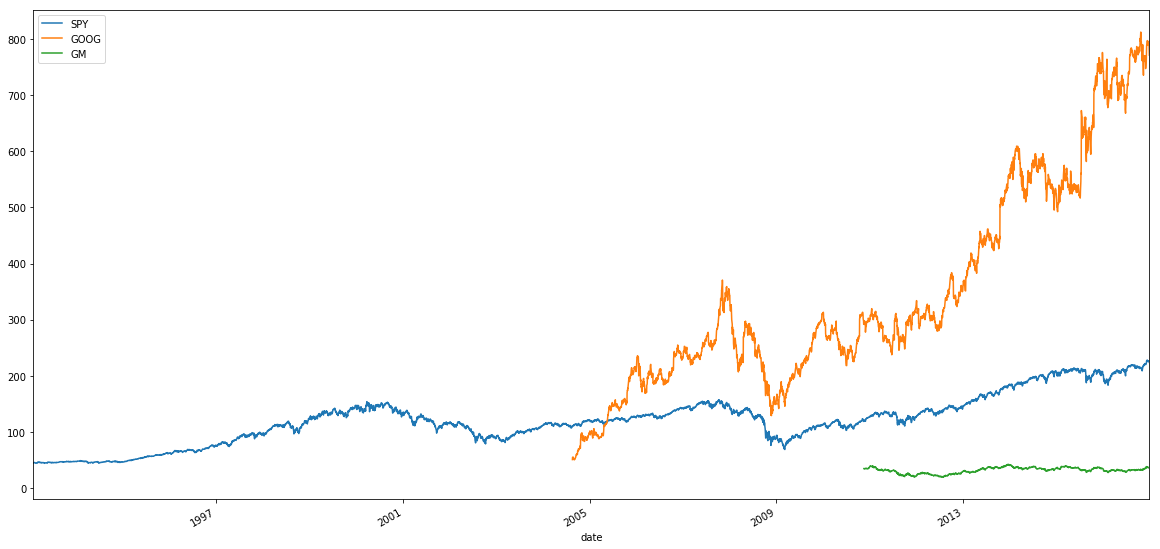

In [8]:
select = ['SPY', 'GOOG', 'GM']
selected_df = data_df.xs('Close', level='feature').loc[:,select]
selected_df.plot()

In [9]:
selected_df = preprocessing.fill_missing(selected_df)

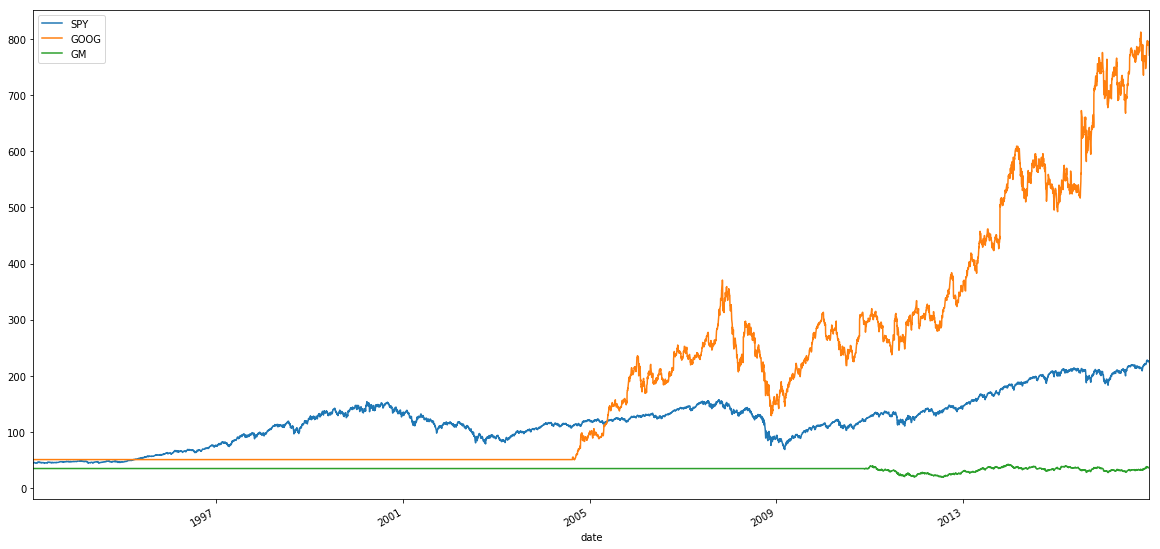

In [10]:
selected_df.plot()

## A useful function to show the evolution of a portfolio value

In [11]:
from utils import analysis

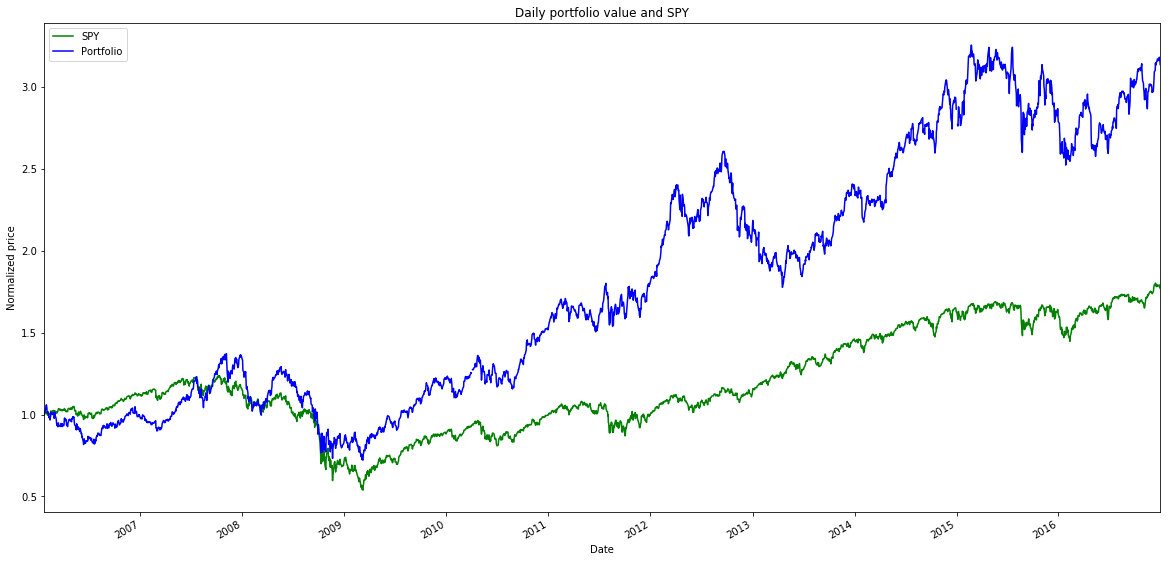

Start Date: 2006-01-22 00:00:00
End Date: 2016-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'AMD', 'XOM']
Allocations [0.1, 0.2, 0.3, 0.4]
Sharpe Ratio: 0.556024532367885
Volatility (stdev of daily returns): 0.015456113199320
Average Daily Return: 0.000541369734811
Cumulative Return: 2.134134005247434


(2.134134005247434,
 0.0005413697348107245,
 0.01545611319931999,
 0.5560245323678845,
 3134.134005247434)

In [12]:
analysis.assess_portfolio(start_date = dt.datetime(2006,1,22),
                          end_date = dt.datetime(2016,12,31),
                          symbols = ['GOOG','AAPL','AMD','XOM'],
                          allocations = [0.1,0.2,0.3,0.4],
                          initial_capital = 1000, 
                          risk_free_rate = 0.0,
                          sampling_frequency = 252.0,
                          data = data_df,
                          gen_plot=True,
                          verbose=True)

In [13]:
from utils import marketsim

### Limit leverage to 2.0

sharpeRatio = 0.883609
cumRet = 0.234600
sdDReturn = 0.019109
averageDReturn = 0.001064
Final Value: 123460.000000


(Value    0.883609
 dtype: float64, Value    0.2346
 dtype: float64, Value    0.001064
 dtype: float64, Value    0.019109
 dtype: float64, Value    1.234600
 SPY      0.975587
 Name: 2011-12-20 00:00:00, dtype: float64)

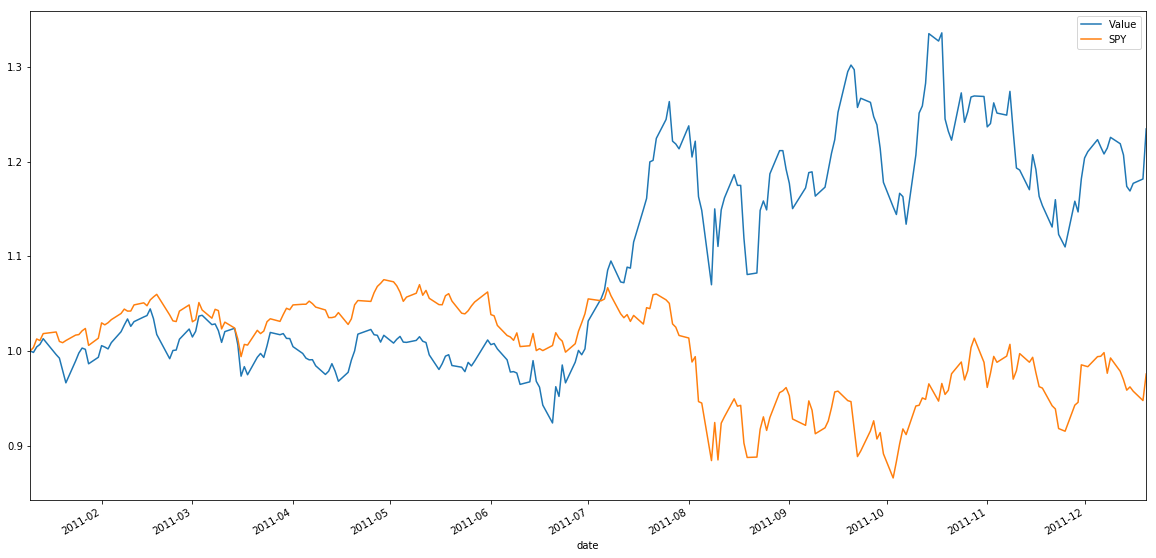

In [14]:
value_df, constituents_df = marketsim.simulate_orders('../../data/orders.csv', 
                                                      data_df, 
                                                      initial_cap=100000, 
                                                      leverage_limit=2.0, 
                                                      from_csv=True)
analysis.value_eval(value_df, verbose=True, graph=True, data_df=data_df)

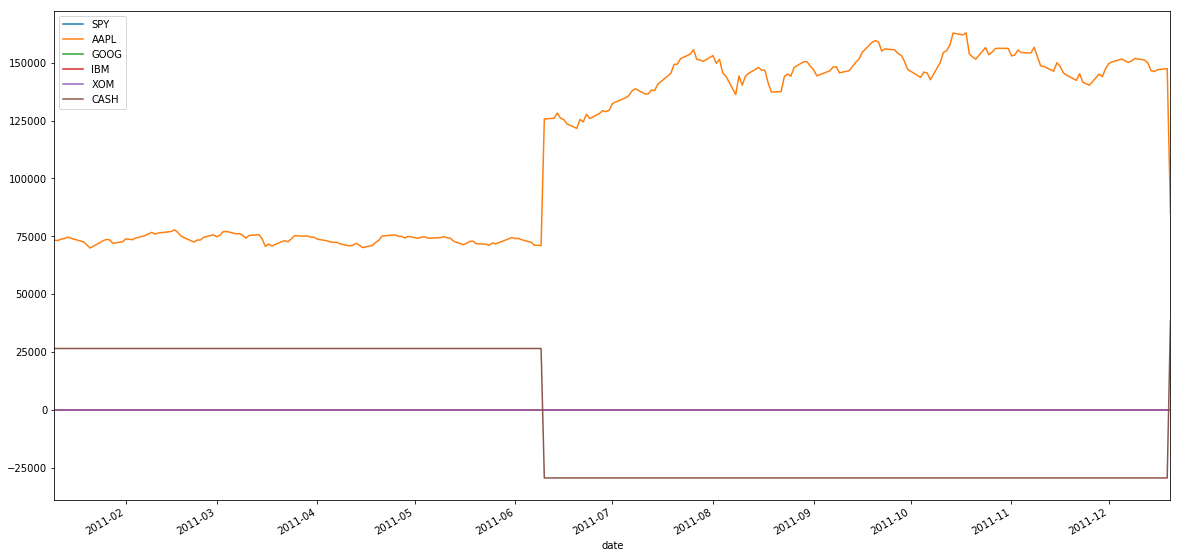

In [15]:
constituents_df.plot()

### No leverage limit

sharpeRatio = 1.084832
cumRet = 7.458760
sdDReturn = 33.616441
averageDReturn = 2.297281
Final Value: 845876.000000


(Value    1.084832
 dtype: float64, Value    7.45876
 dtype: float64, Value    2.297281
 dtype: float64, Value    33.616441
 dtype: float64, Value    8.458760
 SPY      0.975587
 Name: 2011-12-20 00:00:00, dtype: float64)

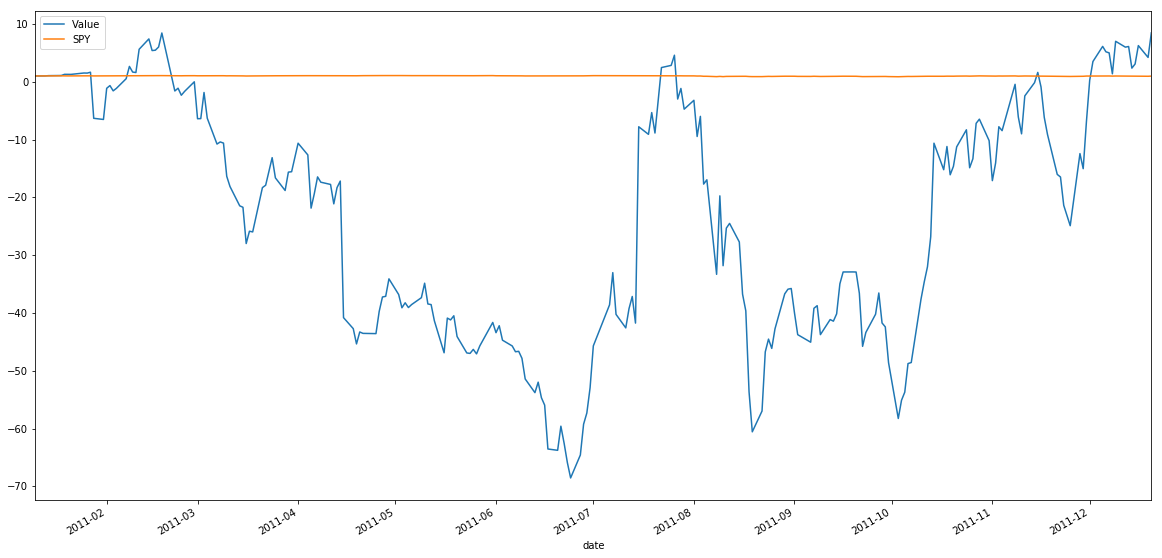

In [16]:
value_df, constituents_df = marketsim.simulate_orders('../../data/orders.csv', 
                                                      data_df, 
                                                      initial_cap=100000, 
                                                      leverage_limit=None, 
                                                      from_csv=True)
analysis.value_eval(value_df, verbose=True, graph=True, data_df=data_df)

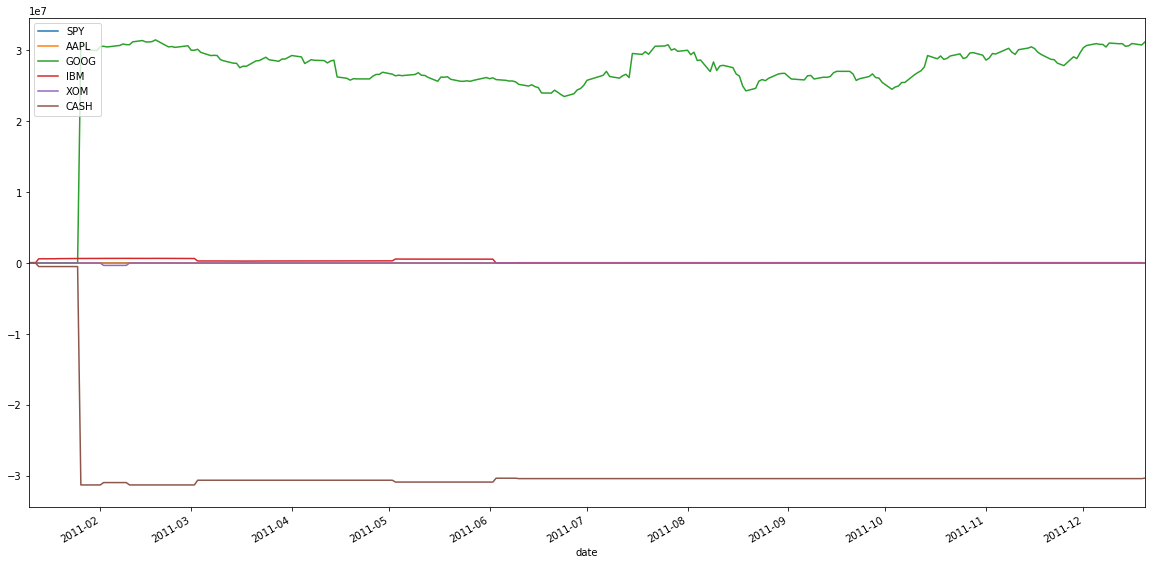

In [17]:
constituents_df.plot()

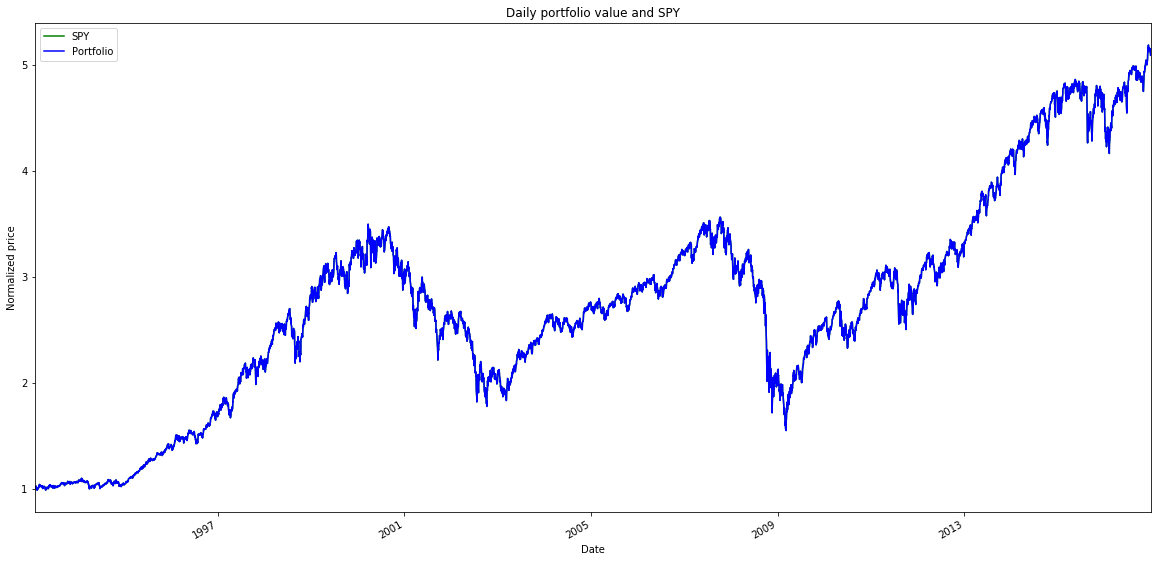

Start Date: 1993-01-22 00:00:00
End Date: 2016-12-31 00:00:00
Symbols: ['SPY']
Allocations [1.0]
Sharpe Ratio: 0.457087056488317
Volatility (stdev of daily returns): 0.011797115215508
Average Daily Return: 0.000339683517391
Cumulative Return: 4.087164314974967


(4.087164314974967,
 0.00033968351739129124,
 0.011797115215508336,
 0.45708705648831705,
 5087.164314974966)

In [18]:
analysis.assess_portfolio(start_date = dt.datetime(1993,1,22),
                          end_date = dt.datetime(2016,12,31),
                          symbols = ['SPY'],
                          allocations = [1.0],
                          initial_capital = 1000, 
                          risk_free_rate = 0.0,
                          sampling_frequency = 252.0,
                          data = data_df,
                          gen_plot=True,
                          verbose=True)